In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

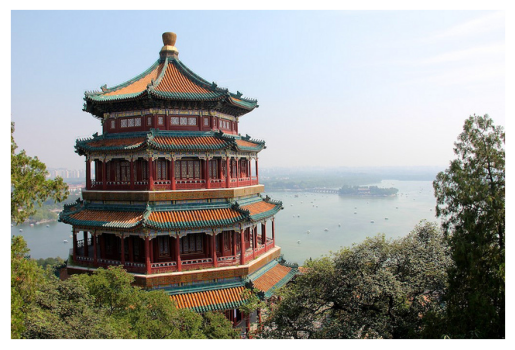

In [2]:
from sklearn.datasets import load_sample_image
india = load_sample_image("china.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(india);

In [3]:
india.shape

(427, 640, 3)

In [5]:
data = india/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

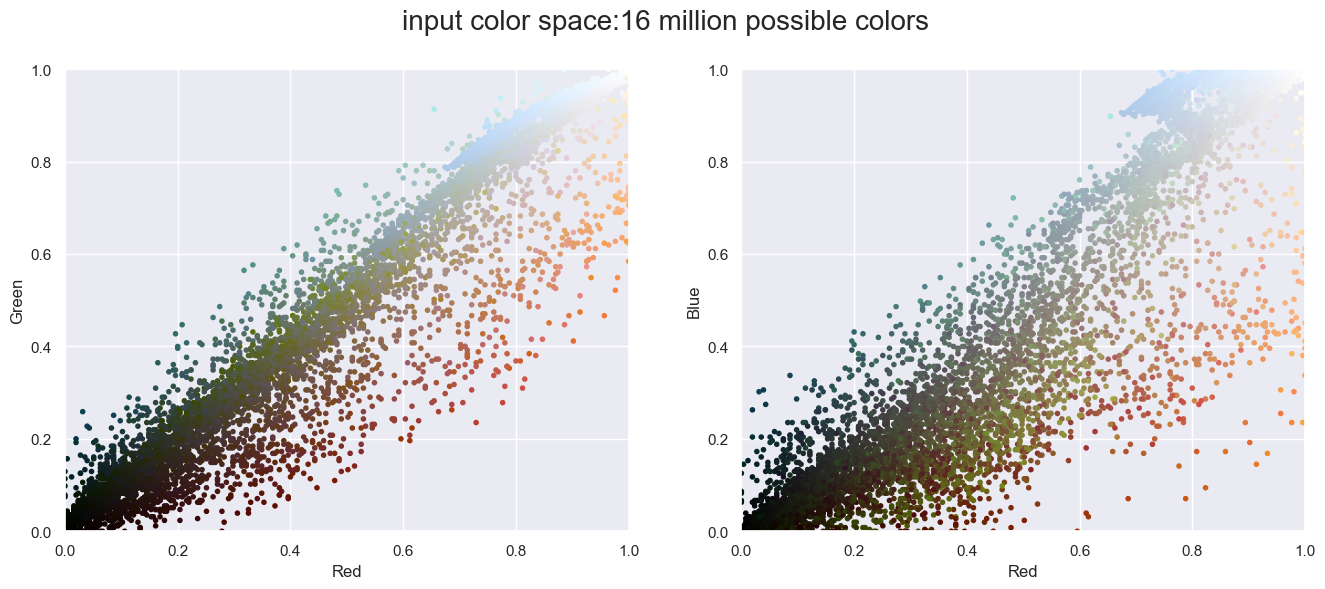

In [6]:
def plot_pixels(data,title,colors = None,N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color = colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);
plot_pixels(data,title='input color space:16 million possible colors')
        

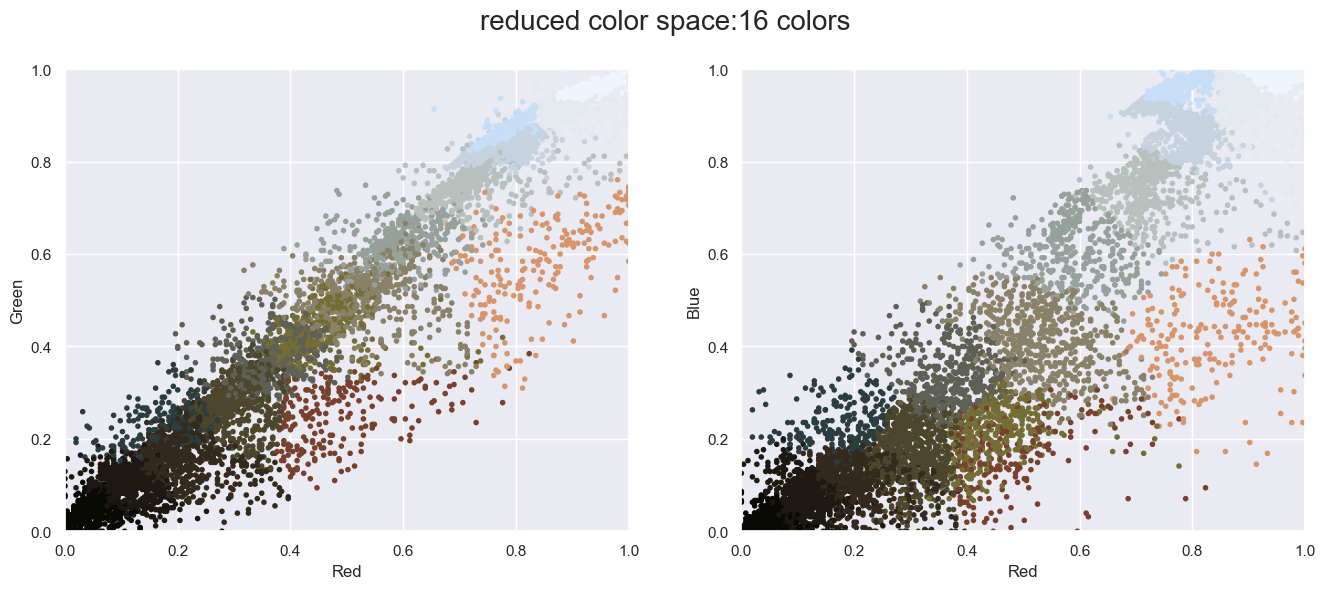

In [7]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="reduced color space:16 colors")

Text(0.5, 1.0, '16-color inage')

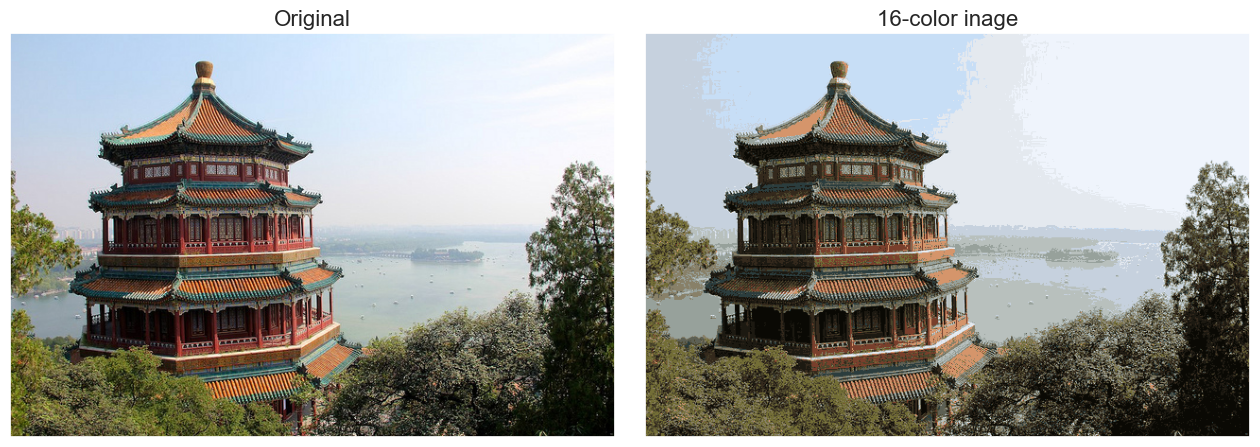

In [8]:
india_recolored = new_colors.reshape(india.shape)
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(india)
ax[0].set_title('Original',size=16)
ax[1].imshow(india_recolored)
ax[1].set_title('16-color inage',size=16)